#### 1. Возьмите датасет Mortality and Water Hardness  
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.


#### 2. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?  

- Построить точечный график  
- Рассчитать коэффициенты корреляции Пирсона и Спирмена  
- Построить модель линейной регрессии  
- Рассчитать коэффициент детерминации  
- Вывести график остатков  



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('water.csv')
data


,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

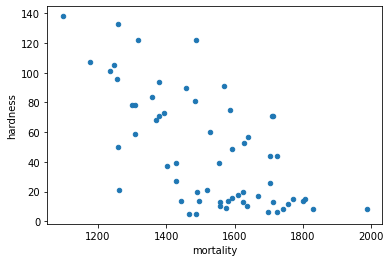

In [3]:
data.plot(kind='scatter', x='mortality', y='hardness')


In [4]:
# Рассчитываем коэффициент корреляции Пирсона
data[['mortality', 'hardness']].corr()


,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [5]:
# Рассчитываем коэффициент корреляции Спирмена
data[['mortality', 'hardness']].corr(method='spearman')


,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [6]:
X = data[['hardness']]
y = data['mortality']


In [7]:
# Строим модель линейной регрессии
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [8]:
a = model.coef_
a


array([-3.22609161])

In [9]:
b = model.intercept_
b


1676.3556007011584

##### Уравнение регрессии:  
y = -3.22609161 * X + 1676.3556007011584


In [10]:
# Находим коэффициент детерминации
model.score(X, y)


0.4288267193124974

,projection,hardness,mortality,residuals
0,1337.615982,105,1247,-90.615982
1,1621.512043,17,1668,46.487957
2,1660.225143,5,1466,-194.225143
3,1631.190318,14,1800,168.809682
4,1618.285952,18,1609,-9.285952
...,...,...,...,...
56,1482.790104,60,1527,44.209896
57,1505.372746,53,1627,121.627254
58,1282.772425,122,1486,203.227575
59,1415.042181,81,1485,69.957819


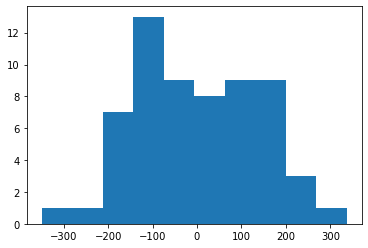

In [11]:
# Построим гистограмму распределения остатков
res = pd.DataFrame()
res['projection'] = model.predict(X)
res['hardness'] = X
res['mortality'] = y
res['residuals'] = res.apply(lambda x: x['mortality'] - x['projection'], axis=1)
plt.hist(res['residuals'])
res


<AxesSubplot:xlabel='residuals', ylabel='hardness'>

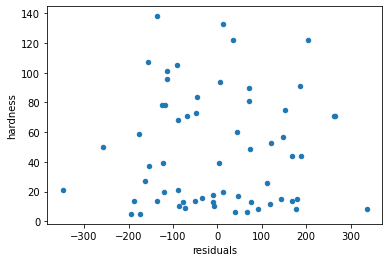

In [12]:
res.plot(kind='scatter', x='residuals', y='hardness')


#### 3. Задание. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы  
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности



In [13]:
# Разделим выборку на группы по признаку локации
data_s = data[data['location'] == 'South']
data_n = data[data['location'] == 'North']


In [14]:
print(len(data_s))
print(len(data_n))


26
35


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

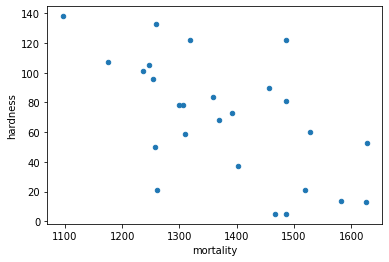

In [15]:
# Посчитаем статистики для южных городов
data_s.plot(kind='scatter', x='mortality', y='hardness')


In [16]:
# Рассчитываем коэффициент корреляции Пирсона
data_s[['mortality', 'hardness']].corr()


,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [17]:
# Рассчитываем коэффициент корреляции Спирмена
data_s[['mortality', 'hardness']].corr(method='spearman')


,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [18]:
X_s = data_s[['hardness']]
y_s = data_s['mortality']

In [19]:
# Строим модель линейной регрессии
model_s = LinearRegression()
model_s.fit(X_s, y_s)


LinearRegression()

In [20]:
a_s = model_s.coef_
a_s


array([-2.09271845])

In [21]:
b_s = model_s.intercept_
b_s


1522.8150485436895

##### Уравнение регрессии (южные города):  
y = -2.09271845 * X + 1522.8150485436895


In [22]:
# Находим коэффициент детерминации
model_s.score(X_s, y_s)


0.3625885624364601

(array([1., 2., 2., 6., 3., 4., 1., 4., 1., 2.]),
 array([-2.18867961e+02, -1.75131505e+02, -1.31395049e+02, -8.76585922e+01,
        -4.39221359e+01, -1.85679612e-01,  4.35507767e+01,  8.72872330e+01,
         1.31023689e+02,  1.74760146e+02,  2.18496602e+02]),
 <BarContainer object of 10 artists>)

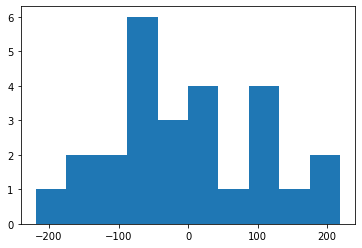

In [23]:
res_s = X_s.copy()
res_s['mortality'] = y_s
res_s['projection'] = model_s.predict(res_s[['hardness']])
res_s['residuals'] = res_s.apply(lambda x: x['mortality'] - x['projection'], axis=1)

plt.hist(res_s['residuals'])
#res_s


<AxesSubplot:xlabel='residuals', ylabel='hardness'>

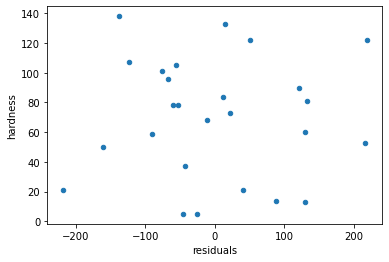

In [24]:
res_s.plot(kind='scatter', x='residuals', y='hardness')


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

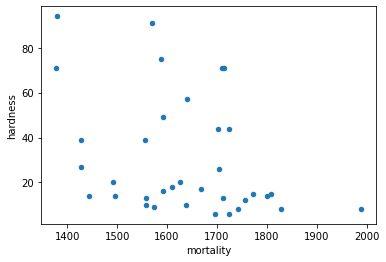

In [25]:
# Посчитаем статистики для северных городов
data_n.plot(kind='scatter', x='mortality', y='hardness')


In [26]:
# Рассчитываем коэффициент корреляции Пирсона
data_n[['mortality', 'hardness']].corr()


,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [27]:
# Рассчитываем коэффициент корреляции Спирмена
data_n[['mortality', 'hardness']].corr(method='spearman')


,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [28]:
X_n = data_n[['hardness']]
y_n = data_n['mortality']


In [29]:
# Строим модель линейной регрессии
model_n = LinearRegression()
model_n.fit(X_n, y_n)


LinearRegression()

In [30]:
a_n = model_n.coef_
a_n


array([-1.93134215])

In [31]:
b_n = model_n.intercept_
b_n


1692.312801433099

##### Уравнение регрессии (северные города):  
y = -1.93134215 * X + 1692.312801433099


In [32]:
# Находим коэффициент детерминации
model_n.score(X_n, y_n)


0.1358643664207173

(array([5., 3., 4., 3., 6., 6., 4., 3., 0., 1.]),
 array([-221.2740113 , -168.13281659, -114.99162188,  -61.85042717,
          -8.70923247,   44.43196224,   97.57315695,  150.71435166,
         203.85554637,  256.99674108,  310.13793579]),
 <BarContainer object of 10 artists>)

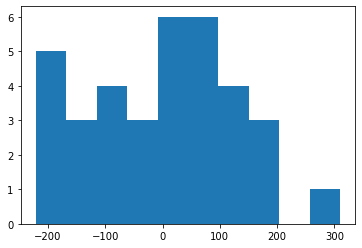

In [33]:
res_n = X_n.copy()
res_n['mortality'] = y_n
res_n['projection'] = model_n.predict(res_n[['hardness']])
res_n['residuals'] = res_n.apply(lambda x: x['mortality'] - x['projection'], axis=1)

plt.hist(res_n['residuals'])
#res_n


<AxesSubplot:xlabel='residuals', ylabel='hardness'>

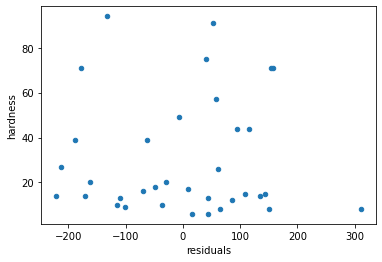

In [34]:
res_n.plot(kind='scatter', x='residuals', y='hardness')
